# House Price Prediction: EDA

## Introduction
### Dataset statistics

Number of houses : 21613<br>
Number of House Features:19<br>
Median prices of the Houses:450000.0<br>

### Data Field Explanation

Id- Unique row number <br>
Data- Date at which data has been collected<br>
Price- Expected price of each house<br>
Bedrooms- Number of bedrooms in each house<br>
Bathroom- Number of bathrooms in each house<br>
Sqft_living- Living area in sqft<br>
Sqft_lot- Lot size in square feet<br>
Floors- Number of floors in house<br>
Waterfront- Water view in front of house<br>
View- Views from house<br>
Condition- Condition of house<br>
grade- Rating of house<br>
Sqft_above- Area above the ground<br>
Sqft_basement- Area of basement<br>
Yr_built- The year in which house was build<br>
Yr_renovated- The year in which house was renovated<br>
Zipcode- Area code of house<br>
Lat- Latitude of house<br>
Long- Longitude of house<br>

### Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


#### Observation:  Data has only int and Float values and no column has any missing values

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [9]:
df.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [10]:
df.apply(np.max)

id                    9900000190
date             20150527T000000
price                    7.7e+06
bedrooms                      33
bathrooms                      8
sqft_living                13540
sqft_lot                 1651359
floors                       3.5
waterfront                     1
view                           4
condition                      5
grade                         13
sqft_above                  9410
sqft_basement               4820
yr_built                    2015
yr_renovated                2015
zipcode                    98199
lat                      47.7776
long                    -121.315
sqft_living15               6210
sqft_lot15                871200
dtype: object

# Exploratory Data Analysis

The Dependent variable "Grade" is Discrete and Categorical in nature.<br>
As of now we have saw that mostly houses have 7 grades(8981) of all the houses.The next most prevalent grade is 9(6068), followed by 9(2651), 6(2038), and only few house have grade like 1,3,13.<br>
There are no missing values in our dataset

## Univariate Analysis

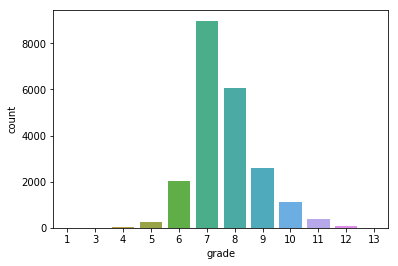

In [11]:
sns.countplot(x='grade',data=df)

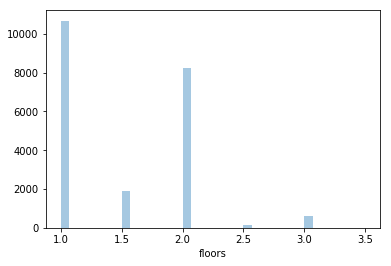

In [12]:
sns.distplot(df['floors'],kde=False)

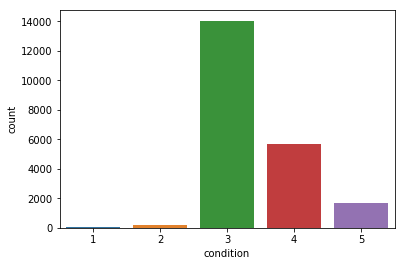

In [13]:
sns.countplot(x='condition',data=df)

In [14]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

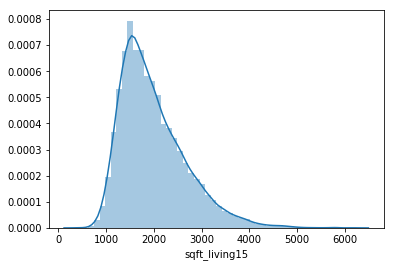

In [15]:
sns.distplot(df['sqft_living15'])

#### Observation: 
Most of the houses have bedrooms in between 2 and 5, Also house of condition catagory 3 are maximum followed by 4 and 5<br>


## Bivariate Analysis

In [16]:
pd.crosstab(df['floors'], df['grade'], margins=True)

grade,1,3,4,5,6,7,8,9,10,11,12,13,All
floors,,,,,,,,,,,,,
1.0,1,3,27,202,1662,5916,2233,447,142,34,11,2,10680
1.5,0,0,2,38,311,1006,402,105,35,11,0,0,1910
2.0,0,0,0,2,63,1943,2989,1935,906,323,72,8,8241
2.5,0,0,0,0,2,15,53,46,26,14,2,3,161
3.0,0,0,0,0,0,100,385,82,25,17,4,0,613
3.5,0,0,0,0,0,1,6,0,0,0,1,0,8
All,1,3,29,242,2038,8981,6068,2615,1134,399,90,13,21613


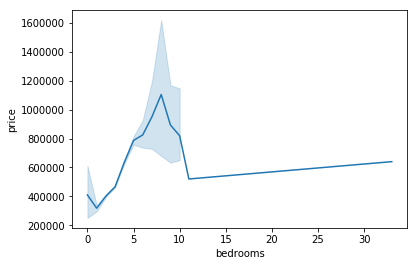

In [17]:
sns.lineplot(x='bedrooms',y='price',data=df)

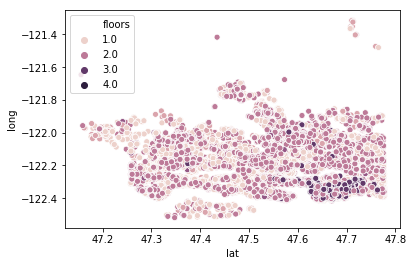

In [18]:
sns.scatterplot(x='lat', y='long',data=df,hue='floors')

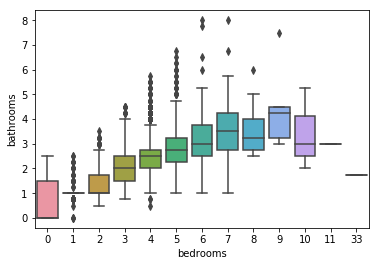

In [20]:
sns.boxplot(x='bedrooms',y='bathrooms',data=df)

<Figure size 432x288 with 0 Axes>

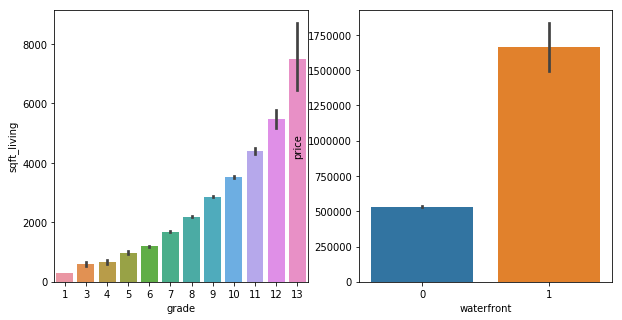

In [21]:
plt.figure(1)

plt.subplots_adjust(hspace=0.5, wspace=0.7)
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.barplot(x='grade', y='sqft_living',data=df)

plt.subplot(122)
sns.barplot(x='waterfront', y='price',data=df)

plt.show()

### Observation
Houses having a waterfront cost thrice as high as house without one.
Higher the area of living room higher is the grade of the house.

## Multivariate Analysis

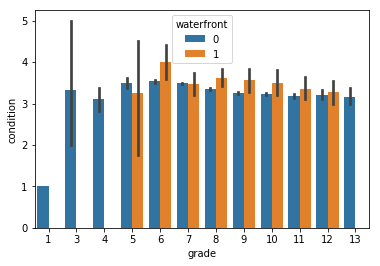

In [19]:
sns.barplot(x='grade',y='condition',data=df,hue='waterfront')

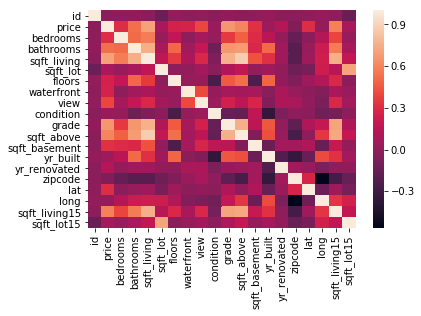

In [22]:
sns.heatmap(df.corr())

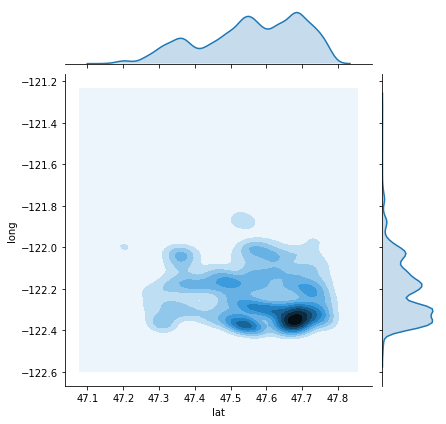

In [23]:
sns.jointplot(x='lat', y='long',data=df, kind='kde')

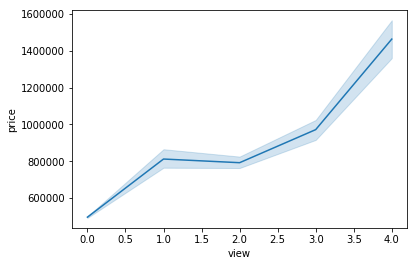

In [29]:
sns.lineplot(x='view',y='price',data=df)

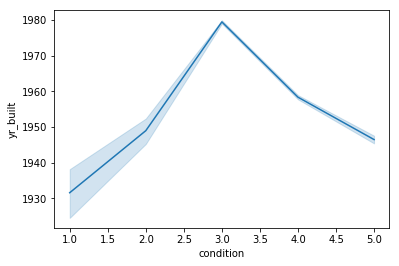

In [26]:
sns.lineplot(x='condition',y='yr_built',data=df)

### Summary
House made in years after 1950 have condition rating more that 2 out of 5<br>
Houses having bdrooms around 7-8 has the highest price.<br>
Most of the houses lie in the region having Latitudes between 47.6 to 47.7 and Longitude -122.2 to -122.4
